# Exercise 1 – Business Sales Analysis

This notebook analyzes the `business_sales.csv` dataset step-by-step: loading, summarizing, and visualizing sales trends.

## Step 1 – Load the Dataset and Generate Summary Reports

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("business_sales.csv")

# Display first few rows
df.head()


,Month,Sales
0,Jan,12000
1,Feb,15000
2,Mar,17000
3,Apr,16000
4,May,18000


In [3]:

# Dataset information and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   5 non-null      object
 1   Sales   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Month    0
Sales    0
dtype: int64

In [4]:

# Descriptive statistics for numerical columns
df.describe()


,Sales
count,5.000000
mean,15600.000000
std,2302.172887
min,12000.000000
25%,15000.000000
50%,16000.000000
75%,17000.000000
max,18000.000000


## Step 2 – Generate Descriptive Statistics and Pivot Tables

In [5]:

# Pivot table: total sales by month
pivot_month = df.pivot_table(values="Sales", index="Month", aggfunc="sum")

# Sort months if standard abbreviations used
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pivot_month = pivot_month.reindex(index=[m for m in month_order if m in df["Month"].values])

pivot_month


,Sales
Month,
Jan,12000
Feb,15000
Mar,17000
Apr,16000
May,18000


## Step 3 – Create Charts to Visualize Sales Trends

/var/folders/3k/p_t1dcts4h109f1kk34xfq6r0000gn/T/ipykernel_3540/2093696087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_month.index, y=pivot_month["Sales"], palette="coolwarm")


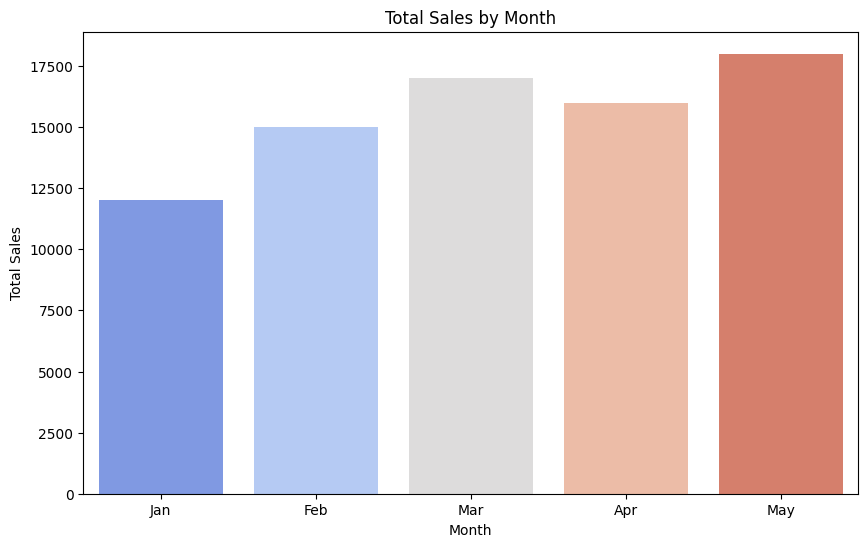

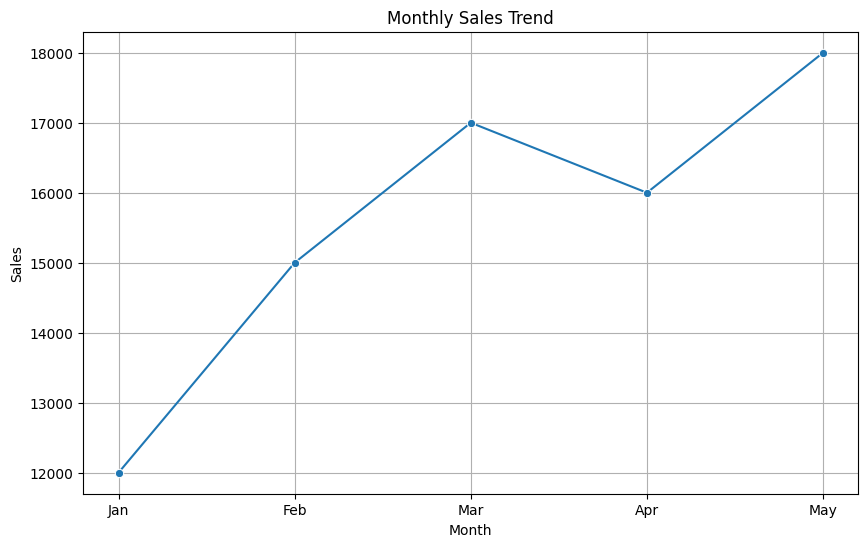

In [6]:

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_month.index, y=pivot_month["Sales"], palette="coolwarm")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=pivot_month, x=pivot_month.index, y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


## Step 4 – Add Filtering by Month or Product Category

Filtered results for months: ['Jan', 'Feb']


,Month,Sales
0,Jan,12000
1,Feb,15000


/var/folders/3k/p_t1dcts4h109f1kk34xfq6r0000gn/T/ipykernel_3540/301267083.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="Month", y="Sales", palette="mako")


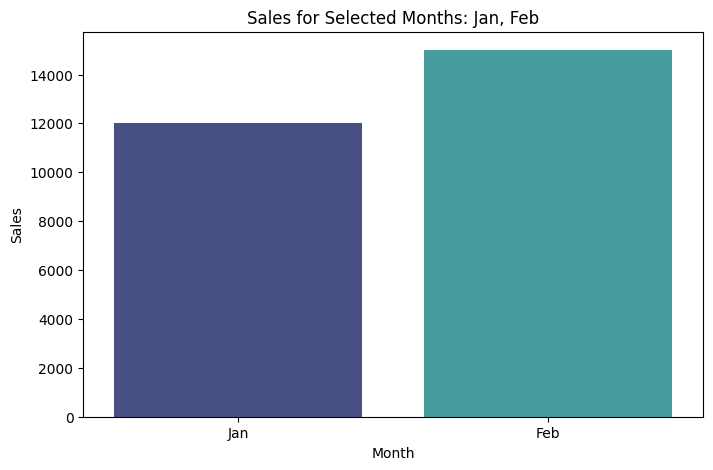

In [7]:
# --- Filter by Month ---
selected_months = ["Jan", "Feb"]  # change these months as needed
filtered_df = df[df["Month"].isin(selected_months)]

print(f"Filtered results for months: {selected_months}")
display(filtered_df)

plt.figure(figsize=(8,5))
sns.barplot(data=filtered_df, x="Month", y="Sales", palette="mako")
plt.title(f"Sales for Selected Months: {', '.join(selected_months)}")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [8]:
# --- Optional: Filter by Product Category (if the dataset includes that column) ---
if "Category" in df.columns:
    selected_category = "Electronics"  # change this to any available category
    filtered_cat_df = df[df["Category"] == selected_category]
    print(f"Filtered results for category: {selected_category}")
    display(filtered_cat_df)

    plt.figure(figsize=(8,5))
    sns.barplot(data=filtered_cat_df, x="Month", y="Sales", palette="viridis")
    plt.title(f"Sales Trend for {selected_category}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.show()
else:
    print("Column 'Category' not found in the dataset. Only month filtering applied.")

Column 'Category' not found in the dataset. Only month filtering applied.
